In [36]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from auxPlots import interpolateData, getContours
from nloSbottomXsec import xsecF
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

### Load Recast Data

In [37]:
files = {
        # 'ATLAS-SUSY-2018-13' :'../results_dataFrames/pp2BB1j_2018_13_New.pcl',
         'ATLAS-SUSY-2016-08' :'../results_dataFrames/pp2BB1j_2016_08_latest.pcl',
        #  'ATLAS-SUSY-2018-42' :'../results_dataFrames/pp2BB1j_2018_42_latest.pcl'
         }

recastDataDict = {label : pd.read_pickle(f) for label,f in files.items()}

msb = 'mLLP'
mn1= 'mLSP'
tau = 'tau_ns'

In [38]:
for label,df in recastDataDict.items():
    kfactors = []
    for irow,row in df.iterrows():
        mLLP = row['mLLP']
        xsec = row['Total xsec (pb)']
        k = xsecF(mLLP)/xsec
        kfactors.append(k)
    df['kfactor'] = kfactors

### Plot luminosity for each sample

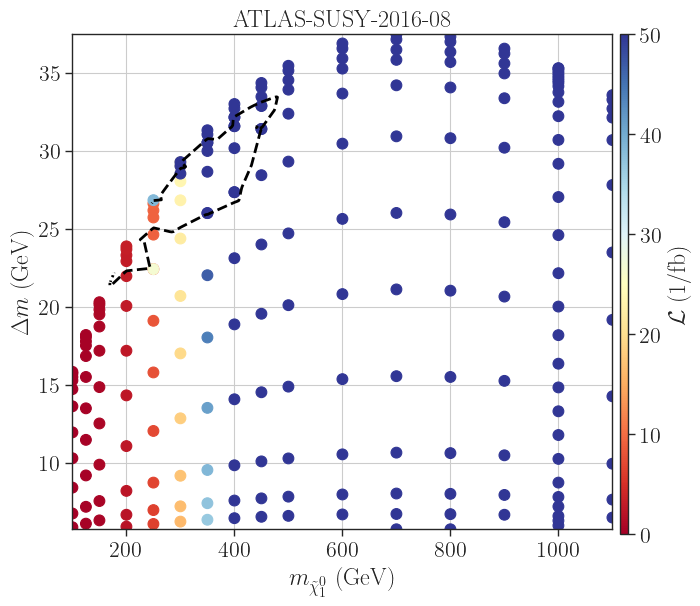

In [39]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(8*len(recastDataDict),5))
if not isinstance(axarr,np.ndarray):
    axarr = [axarr]

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    mcEvents = recastData['Total MC Events']
    xsec = recastData['Total xsec (pb)']
    lumi = mcEvents/(1e3*xsec)
    recastData['Eff lumi'] = lumi
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=50.0,
            c=lumi,cmap=cm,s=60)
    
    rValues = recastData['robs']*recastData['kfactor']
    # Interpolate to create more points
    xnew,ynew,znew = interpolateData(x,y,rValues,nx=300,ny=300)
    cValues = sorted([1.])
    # Get contours
    contours = ax.contour(xnew, ynew, znew, cValues, colors='black',linestyles=['dashed','solid'],linewidths=2.0)
    

    ax.grid()
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)

fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\mathcal{L}$ (1/fb)',cax=cbar_ax)
# plt.tight_layout()
plt.show()

### Number of MC events for given luminosity

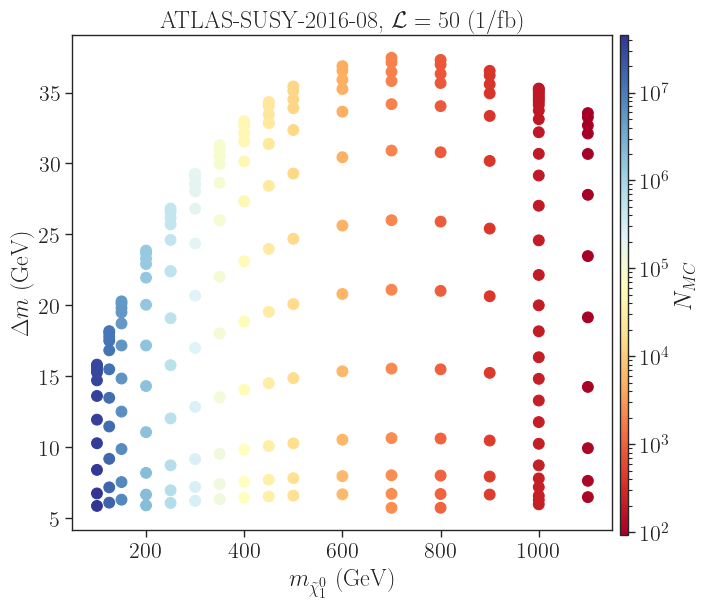

In [40]:
lumi = 50.0
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(8*len(recastDataDict),5))
if not isinstance(axarr,np.ndarray):
    axarr = [axarr]

for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]    
    xsec = recastData['Total xsec (pb)']
    mcEvents = xsec*lumi*1e3
    p = ax.scatter(x=x,y=y,
            c=mcEvents,cmap=cm,s=60,norm=LogNorm())

    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title(r'%s, $\mathcal{L} = %1.0f$ (1/fb)' %(label,lumi))

fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])  
fig.colorbar(p,label=r'$N_{MC}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

### Plot MC error for each analysis

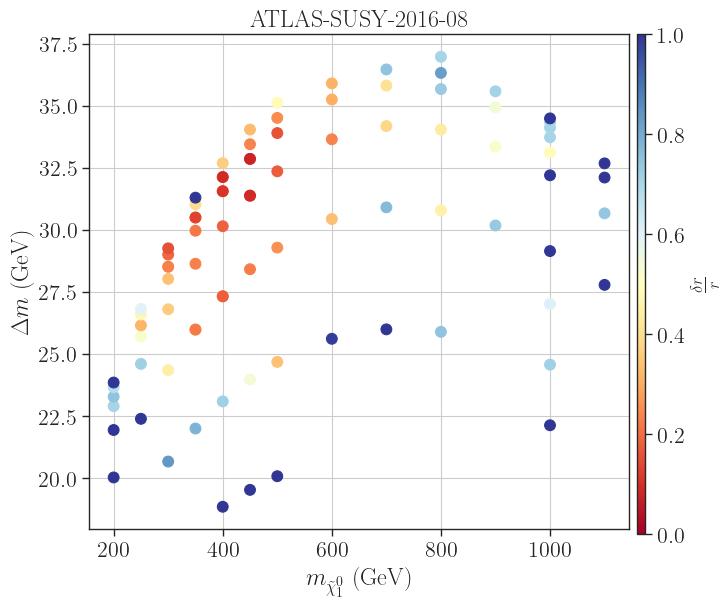

In [41]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(8*len(recastDataDict),5))
if not isinstance(axarr,np.ndarray):
    axarr = [axarr]


for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    rValues = recastData['robs']
    rValuesErr = recastData['robsErr']
    ratio = rValuesErr/rValues
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=1.0,
            c=ratio,cmap=cm,s=60)
    
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    # ax.set_xlim(50.0,1.1*x.max())
    # ax.set_ylim(5.0,1.1*y.max())
    ax.grid()


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$\frac{\delta r}{r}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

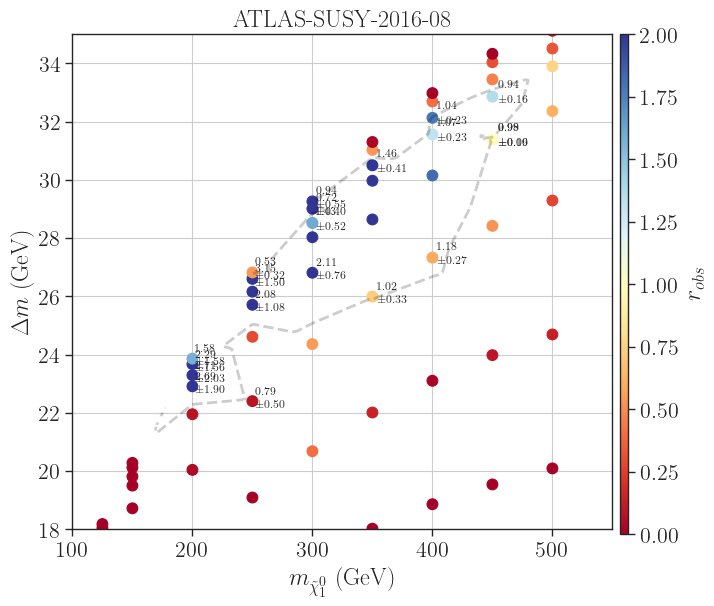

In [61]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(8*len(recastDataDict),5))
if not isinstance(axarr,np.ndarray):
    axarr = [axarr]

low_stats = []
for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    tau = recastData['tau_ns']
    mcEvents = recastData['Total MC Events']/1e3
    rValues = recastData['robs']*recastData['kfactor']
    rValuesErr = recastData['robsErr']*recastData['kfactor']
    p = ax.scatter(x=x,y=y,vmin=0.0,vmax=2.0,
            c=rValues,cmap=cm,s=60)
    
    xnew,ynew,znew = interpolateData(x,y,rValues,nx=300,ny=300)
    cValues = sorted([1.])
    # Get contours
    contours = ax.contour(xnew, ynew, znew, cValues, colors='black',
                          linestyles=['dashed','solid'],linewidths=2.0,alpha=0.2)

    for i,pt in enumerate(x):
        # plt.text(1.05*x[i],1.05*y[i],r'$%1.1e \pm %1.1e$' %(rValues[i],rValuesErr[i]),fontsize=5)
        if not rValues[i]:
            continue
        if (rValues[i] < 1.0) and (rValues[i]+1.5*rValuesErr[i] < 1.0):
            continue
        if (rValues[i] > 1.0) and (rValues[i]-1.5*rValuesErr[i] > 1.0):
            continue
        # if rValues[i] > 1.5:
            # continue
        ax.text(1.01*x[i],1.01*y[i],r'$%1.2f$' %(rValues[i]),fontsize=8)
        ax.text(1.01*x[i],y[i]-0.2,r'$\pm %1.2f$' %(rValuesErr[i]),fontsize=8)
        low_stats.append([x[i],x[i]+y[i],tau[i],mcEvents[i]])
    
    ax.grid()
    # ax.set_yscale('log')
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(100.0,550.)
    ax.set_ylim(18.0,35.0)


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$r_{obs}$',cax=cbar_ax)
# plt.tight_layout()
plt.show()

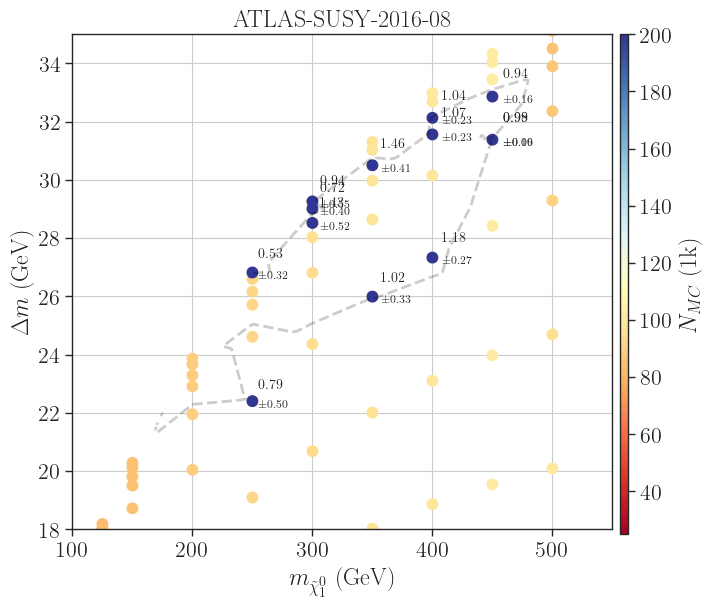

In [43]:
fig,axarr = plt.subplots(nrows=1,ncols=len(recastDataDict),figsize=(8*len(recastDataDict),5))
if not isinstance(axarr,np.ndarray):
    axarr = [axarr]


for iplot,label in enumerate(recastDataDict):
    ax = axarr[iplot]
    recastData = recastDataDict[label]
    y = recastData[msb]-recastData[mn1]
    x = recastData[mn1]
    tau = recastData['tau_ns']
    rValues = recastData['robs']*recastData['kfactor']
    rValuesErr = recastData['robsErr']*recastData['kfactor']
    mcEvents = recastData['Total MC Events']/1e3
    p = ax.scatter(x=x,y=y,vmin=25.0,vmax=200.0,
            c=mcEvents,cmap=cm,s=60)
    
    xnew,ynew,znew = interpolateData(x,y,rValues,nx=300,ny=300)
    cValues = sorted([1.])
    # Get contours
    contours = ax.contour(xnew, ynew, znew, cValues, colors='black',
                          linestyles=['dashed','solid'],linewidths=2.0,alpha=0.2)
    
    for i,pt in enumerate(x):
        # plt.text(1.05*x[i],1.05*y[i],r'$%1.1e \pm %1.1e$' %(rValues[i],rValuesErr[i]),fontsize=5)
        if not rValues[i]:
            continue
        if (rValues[i] < 1.0) and (rValues[i]+1.5*rValuesErr[i] < 1.0):
            continue
        if (rValues[i] > 1.0) and (rValues[i]-1.5*rValuesErr[i] > 1.0):
            continue
        if rValues[i] > 1.5:
            continue
        ax.text(1.02*x[i],1.02*y[i],r'$%1.2f$' %(rValues[i]),fontsize=10)
        ax.text(1.02*x[i],y[i]-0.2,r'$\pm %1.2f$' %(rValuesErr[i]),fontsize=8)
    
    ax.grid()
    # ax.set_yscale('log')
    ax.set_xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_ylabel(r'$\Delta m$ (GeV)')
    ax.set_title('%s' %label)
    ax.set_xlim(100.0,550.)
    ax.set_ylim(18.0,35.0)


fig.subplots_adjust(right=0.8,top=1.1)
cbar_ax = fig.add_axes([0.81, 0.1, 0.01, 1.0])
# fig.colorbar(r, cax=cbar_ax)    
fig.colorbar(p,label=r'$N_{MC}$ (1k)',cax=cbar_ax)
# plt.tight_layout()
plt.show()

In [44]:
low_stats = np.array(low_stats)
low_stats.sort(axis=0)
print(len(low_stats))

13


In [45]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2], "%i" %(3*1e3*pt[3])) for pt in low_stats if (pt[1]-pt[0]) >= 20.0]
# ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in sorted(low_stats) if pt[0] > 0.0]
print(str(ptsIni).replace("'", ""))

[(250.00, 272.40, 3.26e-03, 274851), (250.00, 276.82, 4.00e-03, 284139), (300.00, 328.52, 7.14e-03, 284163), (300.00, 329.01, 1.18e-02, 284454), (300.00, 329.26, 1.30e-02, 290493), (350.00, 375.99, 1.46e-02, 292080), (350.00, 380.50, 1.64e-02, 297987), (400.00, 427.33, 1.76e-02, 298200), (400.00, 431.56, 2.85e-02, 298719), (400.00, 432.13, 5.55e-02, 304098), (450.00, 481.38, 6.25e-02, 304698), (450.00, 481.38, 6.25e-02, 1028805), (450.00, 482.86, 8.38e-02, 1120500)]


In [46]:
masses_tauNew_split = []
nmc_batch = 75000
for pt in low_stats:
    # if pt[0] < 300.0:
        # continue
    mcNeeded = 5*1e3*pt[3]
    nbatches = mcNeeded/nmc_batch
    ntot = 0
    for n in range(int(nbatches)+1):
        nevts = min(nmc_batch,mcNeeded-ntot)
        if nevts <= 0:
            continue
        ntot += nevts
        masses_tauNew_split.append([pt[0],pt[1],pt[2],nevts])
masses_tauNew_split = sorted(masses_tauNew_split)        
print(len(masses_tauNew_split))

125


In [47]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2], "%i" %pt[3]) for pt in sorted(masses_tauNew_split)]
print(str(ptsIni).replace("'", ""))

[(250.00, 272.40, 3.26e-03, 8085), (250.00, 272.40, 3.26e-03, 75000), (250.00, 272.40, 3.26e-03, 75000), (250.00, 272.40, 3.26e-03, 75000), (250.00, 272.40, 3.26e-03, 75000), (250.00, 272.40, 3.26e-03, 75000), (250.00, 272.40, 3.26e-03, 75000), (250.00, 276.82, 4.00e-03, 23564), (250.00, 276.82, 4.00e-03, 75000), (250.00, 276.82, 4.00e-03, 75000), (250.00, 276.82, 4.00e-03, 75000), (250.00, 276.82, 4.00e-03, 75000), (250.00, 276.82, 4.00e-03, 75000), (250.00, 276.82, 4.00e-03, 75000), (300.00, 328.52, 7.14e-03, 23605), (300.00, 328.52, 7.14e-03, 75000), (300.00, 328.52, 7.14e-03, 75000), (300.00, 328.52, 7.14e-03, 75000), (300.00, 328.52, 7.14e-03, 75000), (300.00, 328.52, 7.14e-03, 75000), (300.00, 328.52, 7.14e-03, 75000), (300.00, 329.01, 1.18e-02, 24090), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.01, 1.18e-02, 75000), (300.00, 329.26, 1.3

In [48]:
# Select points with maximum deltaM:
max_dm = []
for mLSP in np.unique(low_stats[:,0]):
    l = low_stats[low_stats[:,0] == mLSP]
    max_dm.append(l[np.argmax(l[:,1])])
print(len(max_dm))

5


In [49]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2]) for pt in max_dm]
print(str(ptsIni).replace("'", ""))

[(250.00, 276.82, 4.00e-03), (300.00, 329.26, 1.30e-02), (350.00, 380.50, 1.64e-02), (400.00, 432.13, 5.55e-02), (450.00, 482.86, 8.38e-02)]


### Events with low MC luminosity

In [50]:
# Select points with small lumi
recastData = recastDataDict['ATLAS-SUSY-2016-08']
low_lumi = recastData[(recastData['Eff lumi'] < 50.) & (recastData[mn1] <= 450.)  & (recastData[mn1] >= 200.)   & (recastData[msb]-recastData[mn1] >= 20.)]
print(len(low_lumi))

22


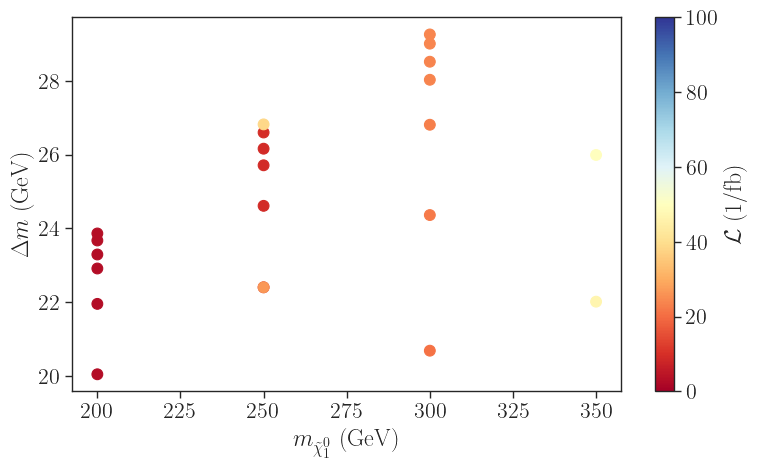

In [51]:
lumi = 50.0
fig = plt.figure(figsize=(8,5))

y = low_lumi[msb]-low_lumi[mn1]
x = low_lumi[mn1]    
lumi = low_lumi['Eff lumi']
p = plt.scatter(x=x,y=y,
        c=lumi,cmap=cm,s=60,vmin=0.,vmax=100.0)

plt.xlabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.ylabel(r'$\Delta m$ (GeV)')
plt.colorbar(label=r'$\mathcal{L}$ (1/fb)')

plt.tight_layout()
plt.show()

In [52]:
mcEvents = low_lumi['Total MC Events']
xsec = low_lumi['Total xsec (pb)']
mcExtra = (xsec*1e3*50.0)-mcEvents

In [53]:
masses_tauNew_split = []
for irow,pt in low_lumi.iterrows():
    mcNeeded = min(500000,mcExtra[irow])
    nbatches = mcNeeded/75000.
    ntot = 0
    for n in range(int(nbatches)+1):
        nevts = min(75000,mcNeeded-ntot)
        if nevts <= 0:
            continue
        ntot += nevts
        masses_tauNew_split.append([pt[mn1],pt[msb],pt['tau_ns'],nevts])
masses_tauNew_split = sorted(masses_tauNew_split)        
print(len(masses_tauNew_split))

94


In [54]:
ptsIni = [("%1.2f" %pt[0], "%1.2f" %pt[1], "%1.2e" %pt[2],"%i" %pt[3]) for pt in masses_tauNew_split]
print(str(ptsIni).replace("'", ""))

[(200.00, 220.04, 1.02e-01, 50000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 220.04, 1.02e-01, 75000), (200.00, 221.95, 5.30e-02, 50000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 221.95, 5.30e-02, 75000), (200.00, 222.91, 2.96e-02, 50000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 222.91, 2.96e-02, 75000), (200.00, 223.29, 2.00e-02, 50000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.29, 2.00e-02, 75000), (200.00, 223.67, 1.

In [65]:
r = recastData[(recastData['mLSP'] < 300.0) & (recastData['mLSP'] > 200.0) & ((recastData['mLLP']-recastData['mLSP']) >= 22.0) & ((recastData['mLLP']-recastData['mLSP']) < 25.0)]
r[['mLLP','mLSP','tau_ns','Total xsec (pb)','Total MC Events','robs','robsErr']]

,mLLP,mLSP,tau_ns,Total xsec (pb),Total MC Events,robs,robsErr
18,272.40,250.0,0.08380,10.521279,91617,0.512333,0.321900
19,274.61,250.0,0.04450,10.089165,91674,0.185933,0.134067
143,272.40,250.0,0.00326,10.511791,279447,0.053767,0.053767


In [56]:
(400.00, 427.33, 2.85e-02, 100941)

(400.0, 427.33, 0.0285, 100941)

In [57]:
np.unique(recastData['mLLP'])

array([ 105.86,  106.74,  108.4 ,  110.28,  111.94,  113.61,  114.71,
        115.27,  115.49,  115.71,  115.82,  131.09,  132.17,  134.18,
        136.46,  138.48,  140.49,  141.83,  142.5 ,  142.77,  143.04,
        143.18,  156.3 ,  157.54,  159.87,  162.51,  164.84,  167.17,
        168.72,  169.5 ,  169.81,  170.12,  170.28,  205.9 ,  206.66,
        208.19,  211.06,  214.31,  217.17,  220.04,  221.95,  222.91,
        223.29,  223.67,  223.86,  256.07,  256.96,  258.72,  262.03,
        265.78,  269.09,  272.4 ,  274.61,  275.71,  276.16,  276.6 ,
        276.82,  306.22,  307.2 ,  309.16,  312.84,  317.  ,  320.68,
        324.36,  326.81,  328.03,  328.52,  329.01,  329.26,  356.34,
        357.4 ,  359.53,  363.51,  368.02,  372.01,  375.99,  378.64,
        379.97,  380.5 ,  381.03,  381.3 ,  406.44,  407.57,  409.83,
        414.06,  418.86,  423.1 ,  427.33,  430.15,  431.56,  432.13,
        432.69,  432.98,  456.53,  457.71,  460.08,  464.51,  469.54,
        473.98,  478

In [58]:
recastData[recastData['mLLP'] == 276.82].T

,23
Luminosity (1/fb),32.8
$N_s$,1.037
$N_s$ Err,0.6193
AccEff,0.000003
AccEffErr,0.000002
VertexEff Strategy,official
mDV cut,10.0
Total,"(318300.0, 1.0)"
Total Error,"(520.8, 0.0)"
Jet+MET selection,"(10960.0, 0.03442)"
